## Section 1

***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
from datetime import datetime, timedelta
import scipy.stats
import pandas_profiling
from pandas_profiling import ProfileReport


%matplotlib inline
#sets the default autosave frequency in seconds
%autosave 60 
sns.set_style('dark')
sns.set(font_scale=1.2)

plt.rc('axes', titlesize=9)
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)

import warnings
warnings.filterwarnings('ignore')

# Use Folium library to plot values on a map.
#import folium

# Use Feature-Engine library
#import feature_engine
#import feature_engine.missing_data_imputers as mdi
#from feature_engine.outlier_removers import Winsorizer
#from feature_engine import categorical_encoders as ce
#from feature_engine.discretisation import EqualWidthDiscretiser, EqualFrequencyDiscretiser, DecisionTreeDiscretiser
#from feature_engine.encoding import OrdinalEncoder

pd.set_option('display.max_columns',None)
#pd.set_option('display.max_rows',None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format','{:.2f}'.format)

np.random.seed(0)
np.set_printoptions(suppress=True)

Autosaving every 60 seconds


### Baseball as a Motivating Example

Load the Lahman library. Filter the Teams data frame to include years from 1961 to 2001. Make a scatterplot of runs per game versus at bats (AB) per game.

In [2]:
df = pd.read_csv("teams.csv")

In [3]:
df

,Year,Team,Lg,Div,Pos,G,W,L,Pct,R,RA,AB,H,2B,3B,HR,TB,BB,HBP,SF,SO,AVG,OBP,SLG,SB,CS,ERA,CG,SHO,SV,IP,ER,HA,HRA,BBA,SOA,BPF,PPF,Ballpark,Attendance
0,1876,BSN,NL,NaN,4,70,39,31,0.56,471,450,2722,723,96,24,9,894.00,58,nan,nan,98.00,0.27,0.28,0.33,nan,nan,2.51,49,3,7,632.00,176,732,7,104,77,102,98,South End Grounds I,nan
1,1876,CHC,NL,NaN,1,66,52,14,0.79,624,257,2748,926,131,32,8,1145.00,70,nan,nan,45.00,0.34,0.35,0.42,nan,nan,1.76,59,9,4,592.00,116,608,6,29,51,112,106,23rd Street Grounds,nan
2,1876,CIN,NL,NaN,8,65,9,56,0.14,238,579,2372,555,51,12,4,642.00,41,nan,nan,136.00,0.23,0.25,0.27,nan,nan,3.62,57,0,0,591.00,238,850,9,34,60,86,95,Avenue Grounds,nan
3,1876,HAR,NL,NaN,3,69,47,21,0.69,429,261,2664,711,96,22,2,857.00,39,nan,nan,78.00,0.27,0.28,0.32,nan,nan,1.67,69,11,0,624.00,116,570,2,27,114,108,103,Hartford Ball Club Grounds,nan
4,1876,LOU,NL,NaN,5,69,30,36,0.46,280,344,2570,641,68,14,6,755.00,24,nan,nan,98.00,0.25,0.26,0.29,nan,nan,1.69,67,5,0,643.00,121,605,3,38,125,118,118,Louisville Baseball Park,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2001,SFG,NL,W,2,162,90,72,0.56,799,748,5612,1493,304,40,235,nan,625,50.00,54.00,1090.00,0.27,0.34,0.46,57.00,42.00,4.18,3,8,47,1463.30,680,1437,145,579,1080,91,92,NaN,3311958.00
2381,2001,STL,NL,C,2,162,93,69,0.57,814,684,5450,1469,274,32,199,nan,529,65.00,50.00,1089.00,0.27,0.34,0.44,91.00,35.00,3.93,8,11,38,1435.30,627,1389,196,526,1083,99,99,NaN,3109578.00
2382,2001,TBD,AL,E,5,162,62,100,0.38,672,887,5524,1426,311,21,121,nan,456,54.00,25.00,1116.00,0.26,0.32,0.39,115.00,52.00,4.94,1,6,30,1423.70,781,1513,207,569,1030,100,100,NaN,1298365.00
2383,2001,TEX,AL,W,4,162,73,89,0.45,890,968,5685,1566,326,23,246,nan,548,75.00,55.00,1093.00,0.28,0.34,0.47,97.00,32.00,5.71,4,3,37,1438.30,913,1670,222,596,951,100,100,NaN,2831021.00


In [4]:
df2 = df[(df["Year"] > 1960) & (df["Year"] < 2002)]

In [5]:
df2

,Year,Team,Lg,Div,Pos,G,W,L,Pct,R,RA,AB,H,2B,3B,HR,TB,BB,HBP,SF,SO,AVG,OBP,SLG,SB,CS,ERA,CG,SHO,SV,IP,ER,HA,HRA,BBA,SOA,BPF,PPF,Ballpark,Attendance
1188,1961,BAL,AL,NaN,3,163,95,67,0.59,691,588,5481,1393,227,36,149,2139.00,581,nan,nan,902.00,0.25,0.33,0.39,39.00,30.00,3.22,54,21,33,1471.00,526,1226,109,617,926,98,97,Memorial Stadium,951089.00
1189,1961,BOS,AL,NaN,6,163,76,86,0.47,729,792,5508,1401,251,37,112,2062.00,647,nan,nan,847.00,0.25,0.33,0.37,56.00,36.00,4.29,35,6,30,1442.00,687,1472,167,679,831,102,104,Fenway Park II,850589.00
1190,1961,CHC,NL,NaN,7,156,64,90,0.42,689,800,5344,1364,238,51,176,2232.00,539,nan,nan,1027.00,0.26,0.32,0.42,35.00,25.00,4.48,34,6,25,1385.00,689,1492,165,465,755,101,104,Wrigley Field,673057.00
1191,1961,CHW,AL,NaN,4,163,86,76,0.53,765,726,5556,1475,216,46,138,2197.00,550,nan,nan,612.00,0.27,0.33,0.40,100.00,40.00,4.06,39,3,33,1448.00,653,1491,158,498,814,98,97,Comiskey Park,1146019.00
1192,1961,CIN,NL,NaN,1,154,93,61,0.60,710,653,5243,1414,247,35,158,2205.00,423,nan,nan,761.00,0.27,0.32,0.42,70.00,33.00,3.78,46,12,40,1370.00,575,1300,147,500,829,101,101,Crosley Field,1117603.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2380,2001,SFG,NL,W,2,162,90,72,0.56,799,748,5612,1493,304,40,235,nan,625,50.00,54.00,1090.00,0.27,0.34,0.46,57.00,42.00,4.18,3,8,47,1463.30,680,1437,145,579,1080,91,92,NaN,3311958.00
2381,2001,STL,NL,C,2,162,93,69,0.57,814,684,5450,1469,274,32,199,nan,529,65.00,50.00,1089.00,0.27,0.34,0.44,91.00,35.00,3.93,8,11,38,1435.30,627,1389,196,526,1083,99,99,NaN,3109578.00
2382,2001,TBD,AL,E,5,162,62,100,0.38,672,887,5524,1426,311,21,121,nan,456,54.00,25.00,1116.00,0.26,0.32,0.39,115.00,52.00,4.94,1,6,30,1423.70,781,1513,207,569,1030,100,100,NaN,1298365.00
2383,2001,TEX,AL,W,4,162,73,89,0.45,890,968,5685,1566,326,23,246,nan,548,75.00,55.00,1093.00,0.28,0.34,0.47,97.00,32.00,5.71,4,3,37,1438.30,913,1670,222,596,951,100,100,NaN,2831021.00


In [6]:
df2["RPG"] = df2["R"] / df2["G"]

In [7]:
df2["BPG"] = df2["AB"] / df2["G"]

In [8]:
df2.head()

,Year,Team,Lg,Div,Pos,G,W,L,Pct,R,RA,AB,H,2B,3B,HR,TB,BB,HBP,SF,SO,AVG,OBP,SLG,SB,CS,ERA,CG,SHO,SV,IP,ER,HA,HRA,BBA,SOA,BPF,PPF,Ballpark,Attendance,RPG,BPG
1188,1961,BAL,AL,NaN,3,163,95,67,0.59,691,588,5481,1393,227,36,149,2139.00,581,nan,nan,902.00,0.25,0.33,0.39,39.00,30.00,3.22,54,21,33,1471.00,526,1226,109,617,926,98,97,Memorial Stadium,951089.00,4.24,33.63
1189,1961,BOS,AL,NaN,6,163,76,86,0.47,729,792,5508,1401,251,37,112,2062.00,647,nan,nan,847.00,0.25,0.33,0.37,56.00,36.00,4.29,35,6,30,1442.00,687,1472,167,679,831,102,104,Fenway Park II,850589.00,4.47,33.79
1190,1961,CHC,NL,NaN,7,156,64,90,0.42,689,800,5344,1364,238,51,176,2232.00,539,nan,nan,1027.00,0.26,0.32,0.42,35.00,25.00,4.48,34,6,25,1385.00,689,1492,165,465,755,101,104,Wrigley Field,673057.00,4.42,34.26
1191,1961,CHW,AL,NaN,4,163,86,76,0.53,765,726,5556,1475,216,46,138,2197.00,550,nan,nan,612.00,0.27,0.33,0.40,100.00,40.00,4.06,39,3,33,1448.00,653,1491,158,498,814,98,97,Comiskey Park,1146019.00,4.69,34.09
1192,1961,CIN,NL,NaN,1,154,93,61,0.60,710,653,5243,1414,247,35,158,2205.00,423,nan,nan,761.00,0.27,0.32,0.42,70.00,33.00,3.78,46,12,40,1370.00,575,1300,147,500,829,101,101,Crosley Field,1117603.00,4.61,34.05


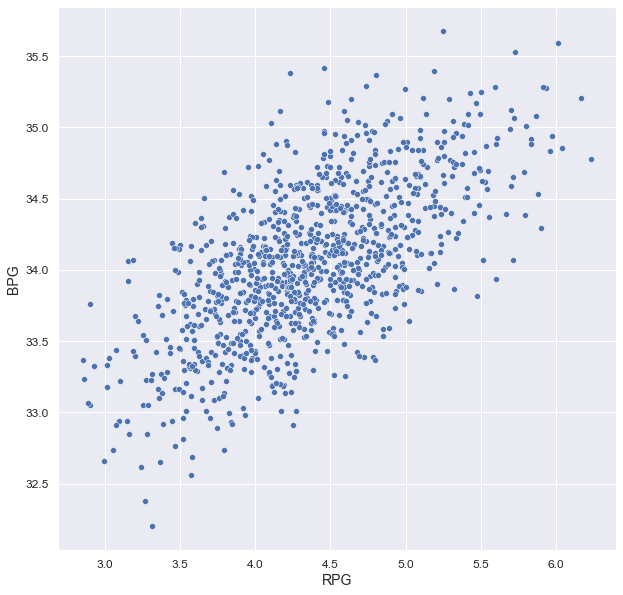

In [9]:
fig = plt.figure(figsize=(10,10))

plt.title("")
sns.scatterplot(x="RPG", y="BPG", data=df2)
plt.show()

Use the filtered Teams data frame from Question 6. Make a scatterplot of win rate (number of wins per game) versus number of fielding errors (E) per game.

In [10]:
df2["WPG"] = df2["W"] / df2["G"]

In [11]:
df2["EPG"] = df2["ERA"] / df2["G"]

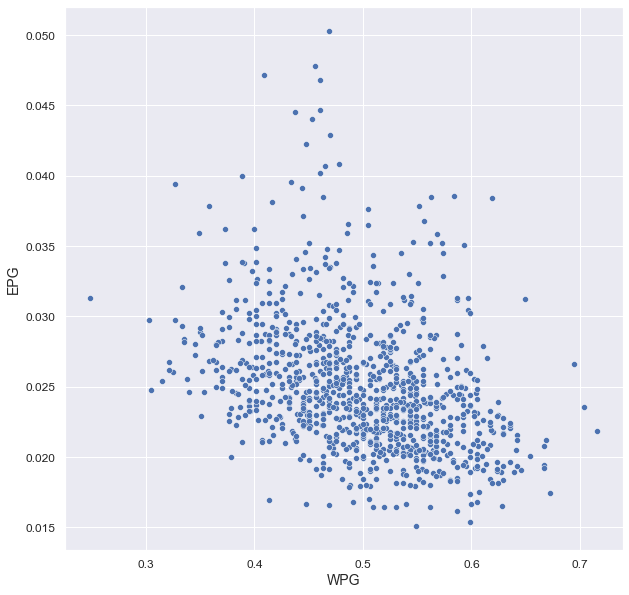

In [12]:
fig = plt.figure(figsize=(10,10))

plt.title("")
sns.scatterplot(x="WPG", y="EPG", data=df2)
plt.show()

Use the filtered Teams data frame from Question 6. Make a scatterplot of triples (X3B) per game versus doubles (X2B) per game.

### Correlation

What is the correlation coefficient between number of runs per game and number of at bats per game?

In [13]:
pearson_correlation = scipy.stats.pearsonr(df2['RPG'], df2['BPG'])

In [14]:
pearson_correlation

(0.6558392640245088, 3.454862494788452e-127)

What is the correlation coefficient between win rate (number of wins per game) and number of errors per game?

In [15]:
pearson_correlation2 = scipy.stats.pearsonr(df2['WPG'], df2['EPG'])

In [16]:
pearson_correlation2

(-0.36831890174250864, 2.5741280136096025e-34)

What is the correlation coefficient between doubles (X2B) per game and triples (X3B) per game?

### Stratification and Variance Explained, Part 2

In [17]:
df3 = pd.read_csv("galtonfamily.csv")

In [18]:
df3.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.50,67.00,75.43,4,1,male,73.20
1,1,78.50,67.00,75.43,4,2,female,69.20
2,1,78.50,67.00,75.43,4,3,female,69.00
3,1,78.50,67.00,75.43,4,4,female,69.00
4,2,75.50,66.50,73.66,4,1,male,73.50


In [19]:
female_heights = df3[df3["gender"] == "female"]

In [20]:
female_heights

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,1,78.50,67.00,75.43,4,2,female,69.20
2,1,78.50,67.00,75.43,4,3,female,69.00
3,1,78.50,67.00,75.43,4,4,female,69.00
6,2,75.50,66.50,73.66,4,3,female,65.50
7,2,75.50,66.50,73.66,4,4,female,65.50
...,...,...,...,...,...,...,...,...
927,202,63.00,63.50,65.79,2,1,female,68.50
928,202,63.00,63.50,65.79,2,2,female,63.50
930,203,62.00,66.00,66.64,3,2,female,62.00
931,203,62.00,66.00,66.64,3,3,female,61.00


In [21]:
female_heights = female_heights[["mother","childHeight"]]

Calculate the mean and standard deviation of mothers' heights, the mean and standard deviation of daughters' heights, and the correlaton coefficient between mother and daughter heights.

In [22]:
female_heights.describe()

,mother,childHeight
count,453.00,453.00
mean,64.15,64.10
std,2.26,2.36
min,58.00,56.00
25%,63.00,62.50
50%,64.00,64.00
75%,65.50,65.50
max,70.50,70.50


In [23]:
female_heights.corr()

,mother,childHeight
mother,1.00,0.31
childHeight,0.31,1.00


Calculate the slope and intercept of the regression line predicting daughters' heights given mothers' heights. Given an increase in mother's height by 1 inch, how many inches is the daughter's height expected to change?

In [24]:
female_heights.columns

Index(['mother', 'childHeight'], dtype='object')

In [25]:
y = female_heights['childHeight']
X = female_heights['mother']

In [26]:
X = sm.add_constant(X)

In [27]:
model = sm.OLS(y,X).fit()

In [28]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            childHeight   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.091
Method:                 Least Squares   F-statistic:                     46.31
Date:                Sat, 03 Apr 2021   Prob (F-statistic):           3.22e-11
Time:                        11:33:29   Log-Likelihood:                -1008.3
No. Observations:                 453   AIC:                             2021.
Df Residuals:                     451   BIC:                             2029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6890      3.002     14.555      0.000      37.790      49.588
mother         0.3182      0.047      6.805      0.000       0.226       0.410
==============================================================================
Omnibus:                        0.518   Durbin-Watson:                   1.268
Prob(Omnibus):                  0.772   Jarque-Bera (JB):                0.354
Skew:                          -0.046   Prob(JB):                        0.838
Kurtosis:                       3.100   Cond. No.                     1.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

What percent of the variability in daughter heights is explained by the mother's height?

Using the regression formula, what is the conditional expected value of her daughter's height given the mother's height?

In [29]:
# y = mx + c
# y = 0.3182x + 43.6890

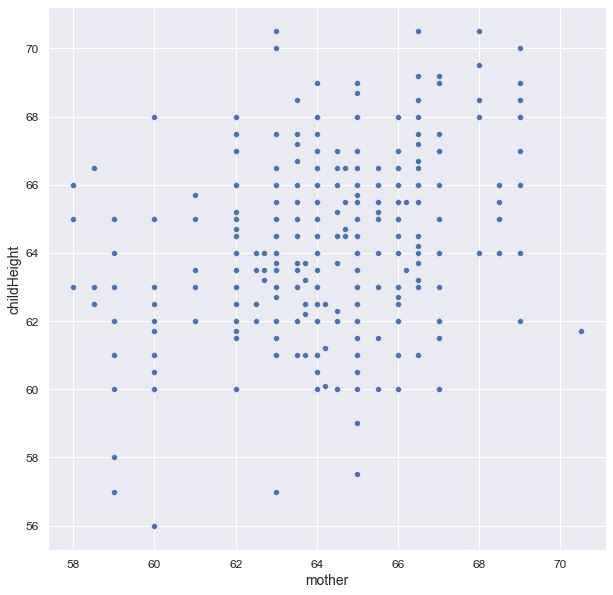

In [30]:
fig = plt.figure(figsize=(10,10))

plt.title("")
sns.scatterplot(x=female_heights.mother, y=female_heights.childHeight, data=female_heights)
plt.show()

In [31]:
y = 0.3182*(60) + 43.6890

In [32]:
y

62.781

#### Python code done by Dennis Lam